# Tutorial 2: Time series

## Data I/O and analysis
Read, display and analize book data. 

The data file for the exercise was obtained in http://ourworldindata.com. 

It is available at https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/new-books-per-million.csv.

### Activities to do:

Write Python functions that: 

(a) Read in the **new-books-per-million.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.


(b) Create 3 new data objects (time series) that contain only the information (rows) for the 3 countries with most entries.


(c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years.


(d) Calculate the average and standard deviation of the annual number of books per million people of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- Books per million people in each (three different arrays)

- Average of books (of these 3 countries)

- Standard deviation of books (of these 3 countries)

### (a) Read in the **new-books-per-million.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.

In [1]:
# Import the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function
def read_file(path):
    """
    """
    return pd.read_csv(path)

In [3]:
# Give the path
path = '/home/whyyorlantaken/Documents/Yachay-Tech/Physics/Tutorials-Comp-Phys-I/Data/new-books-per-million.csv'

# And call the function
dataframe = read_file(path)

### (b) Create 3 new data objects (time series) that contain only the information for the 3 countries with most entries.

#### Count the countries with most entries

In [4]:
# To choose appropiate countries, we have to count how many times they appear
entity = dataframe.iloc[:,0]

In [5]:
# Now let's see which ones appear the most with the following function
def count_elements(array):
    """
    """
    # Create a dictionary
    count = {}
     
    # And run this simple loop to count the elements
    for i in array:
        if i in count:
            count[i] = count[i] + 1
        else:
            count[i] = 1
    
    return count

In [6]:
# Let's use it!
count_elements(entity)

{'Algeria': 18,
 'Argentina': 50,
 'Armenia': 67,
 'Australia': 52,
 'Austria': 51,
 'Azerbaijan': 67,
 'Belarus': 67,
 'Belgium': 431,
 'Brazil': 28,
 'Bulgaria': 56,
 'Canada': 32,
 'Chile': 34,
 'Croatia': 5,
 'Cyprus': 26,
 'Denmark': 210,
 'Egypt': 36,
 'Estonia': 57,
 'Finland': 61,
 'France': 361,
 'Georgia': 67,
 'Germany': 352,
 'Greece': 47,
 'Hungary': 52,
 'Iceland': 37,
 'India': 102,
 'Indonesia': 89,
 'Ireland': 336,
 'Israel': 24,
 'Italy': 360,
 'Japan': 164,
 'Jordan': 17,
 'Kazakhstan': 67,
 'Kenya': 21,
 'Kyrgyzstan': 67,
 'Latvia': 57,
 'Lithuania': 56,
 'Malaysia': 32,
 'Malta': 28,
 'Mexico': 289,
 'Moldova': 51,
 'Morocco': 14,
 'Netherlands': 510,
 'New Zealand': 35,
 'Nigeria': 25,
 'North Macedonia': 4,
 'Norway': 209,
 'Peru': 216,
 'Philippines': 31,
 'Poland': 351,
 'Portugal': 47,
 'Romania': 44,
 'Russia': 187,
 'Saudi Arabia': 7,
 'Slovenia': 6,
 'South Africa': 23,
 'South Korea': 36,
 'Spain': 360,
 'Sweden': 510,
 'Switzerland': 397,
 'Tajikistan': 6

The countries with most entries are the Netherlands, the UK and Sweden.

#### Selecting the data for those three countries

In [7]:
# Funtion
def slice_data(dataset, column_name, country_name):
    """
    """
    # Simply
    country_data = dataset[dataset[column_name] == country_name]

    return country_data

In [8]:
# Column
column = 'Entity'

# Country data
nether_data = slice_data(dataframe, column, 'Netherlands')
uk_data = slice_data(dataframe, column, 'United Kingdom')
sweden_data = slice_data(dataframe, column, 'Sweden')

### (c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years.

#### Checking if everything is right (Spoiler: It's not!)

In [9]:
# Before continuing, check the shapes of each
print(nether_data.shape, uk_data.shape, sweden_data.shape)

(510, 4) (509, 4) (510, 4)


In [10]:
# Check the mins and maxs
print(nether_data.min(), nether_data.max())

Entity                                       Netherlands
Code                                                 NLD
Year                                                1500
Book titles per capita (Fink-Jensen 2015)       0.841543
dtype: object Entity                                       Netherlands
Code                                                 NLD
Year                                                2009
Book titles per capita (Fink-Jensen 2015)    3401.566487
dtype: object


What do you think? How can we find that missing element and its position?

In [11]:
# Get the year UK array
uk_years = np.array(uk_data.iloc[:,2])

In [12]:
# Create a convenient array
convenient_array = np.linspace(uk_years[0]+1, uk_years[-1], len(uk_years))

# And get the difference
diff_array = convenient_array - uk_years

In [13]:
# Find the index of the first 0
index_0 = diff_array.tolist().index(0)

print(f'The index of the element is {index_0}.')

The index of the element is 483.


#### Cleaning the data

In [14]:
# Change the arrays
def clean_data(data):
    """
    """
    # Simply
    return data[data['Year'] != 1983]

In [15]:
# Call the function
nether_data = clean_data(nether_data)
sweden_data = clean_data(sweden_data)

In [16]:
# Now we're in position of selecting the arrays
def select_array(dataset, key):
    """
    """
    return np.array(dataset[key])

In [17]:
# Get the year array
year_array = select_array(sweden_data, 'Year')

In [18]:
# And the books title per capita
nether_books = select_array(nether_data, 'Book titles per capita (Fink-Jensen 2015)')
uk_books = select_array(uk_data, 'Book titles per capita (Fink-Jensen 2015)')
sweden_books = select_array(sweden_data, 'Book titles per capita (Fink-Jensen 2015)')

### (d) Calculate the average and standard deviation of the annual number of books per million people of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- Books per million people in each (three different arrays)

- Average of books (of these 3 countries)

- Standard deviation of books (of these 3 countries)

#### Computation

In [19]:
# Define a function to compute the average and the standard deviation.
def compute_quantities(*array):
    """
    """
    # Get the arrays together
    data_together = np.array(array)

    # Compute the quantities
    # Mean:
    mean = np.mean(data_together, axis = 0)

    # Standard deviation
    std = np.std(data_together, axis = 0)
    
    return mean, std, data_together

In [20]:
# Call the function
mean_array, std_array, _ = compute_quantities(nether_books, uk_books, sweden_books)

#### CSV export with pandas

In [21]:
# Create a pandas frame with a dictionary inside
books_df = pd.DataFrame({"Time": year_array, 
                      "Netherlands": nether_books, 
                      "UK": uk_books,
                      "Sweden": sweden_books, 
                      "Average": mean_array,
                      "Standard Dev": std_array})
# Let's see
books_df.head()

,Time,Netherlands,UK,Sweden,Average,Standard Dev
0,1500,39.545799,13.448084,0.0,17.664627,16.417511
1,1501,33.566862,2.783017,0.0,12.116626,15.210101
2,1502,59.800260,8.579193,0.0,22.793151,26.401328
3,1503,58.075844,5.284888,0.0,21.120244,26.220473
4,1504,46.248946,5.270956,0.0,17.173301,20.671891


In [22]:
# And get it as a csv file
books_df.to_csv('./Data/books_df.csv')

#### Plot!

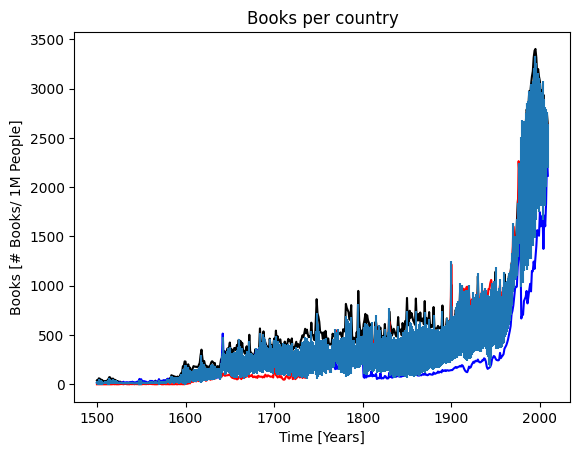

In [23]:
# Plot
plt.figure()

plt.title('Books per country')
plt.xlabel('Time [Years]')
plt.ylabel('Books [# Books/ 1M People]')

plt.plot(year_array, nether_books, color = "k")
plt.plot(year_array, uk_books, color = "b")
plt.plot(year_array, sweden_books, color = "r")

# Mean and stv
plt.errorbar(year_array, mean_array, yerr = std_array)

plt.show()
plt.close()

Comment the results! Discuss.